In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

matplotlib.rcParams.update({'font.size': 17})

matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
import pickle
import numpy as np

In [3]:
def Set_Scales(ax):
	ax.set_xscale('log')
	ax.set_xlim([0.5,350.])
	#ax.set_yscale('log')
	return

<Figure size 640x480 with 0 Axes>

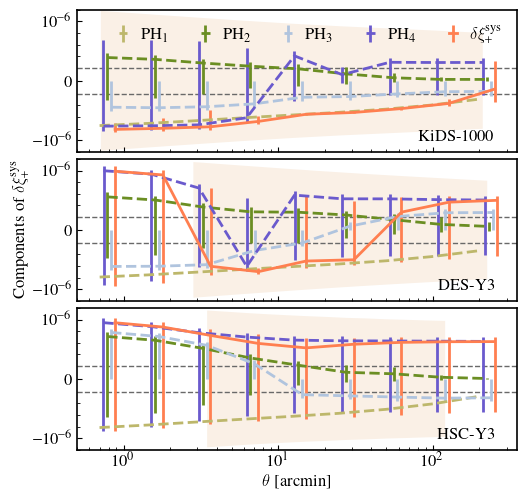

In [8]:
matplotlib.rcParams.update({'font.size': 12})


plt.clf()
fig = plt.figure(figsize=(5.5,5),dpi=100)

gs  = gridspec.GridSpec(3, 1, top=0.98, right=0.96, left=0.16, bottom=0.1,hspace=0.05,wspace=0.15)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

Set_Scales(ax0)
Set_Scales(ax1)
Set_Scales(ax2)

#ax0.set_xlabel(r'$\theta$ [arcmin]')

symlogscale=1e-10
ax0.set_yscale('symlog', linthresh=symlogscale )
ax0.plot( [0.5,400.], [symlogscale, symlogscale],  '--',linewidth=1,color='dimgrey' )
ax0.plot( [0.5,400.], [-1*symlogscale, -1*symlogscale], '--',linewidth=1,color='dimgrey')
ax0.set_ylim([-1*1e-5, 1e-5])

kids1000 = pickle.load( open( "KiDS-1000-PH.pkl", "rb" ) )


# Plot the diagonal covariance
ax0.fill_between(kids1000['5-5']['thetacov'], y1=abs(kids1000['5-5']['Req'])*-1, y2=abs(kids1000['5-5']['Req'])*1, facecolor='linen') 

ax0.errorbar( 10**(np.log10(kids1000['5-5']['theta'])-0.05), kids1000['5-5']['PH1'],
             yerr=kids1000['5-5']['PH1err'],
             color='darkkhaki', linewidth=2, linestyle='--', 
            label = r'PH$_1$')

ax0.errorbar( kids1000['5-5']['theta'], kids1000['5-5']['PH2'],
             yerr=kids1000['5-5']['PH2err'],
             color='olivedrab', linewidth=2, linestyle='--',
            label = r'PH$_2$')

ax0.errorbar( 10**(np.log10(kids1000['5-5']['theta'])+0.025), kids1000['5-5']['PH3'],
             yerr=kids1000['5-5']['PH3err'],
             color='lightsteelblue', linewidth=2, linestyle='--',
            label = r'PH$_3$')

ax0.errorbar( 10**(np.log10(kids1000['5-5']['theta'])-0.025), kids1000['5-5']['PH4'],
             yerr=kids1000['5-5']['PH4err'],
             color='slateblue', linewidth=2, linestyle='--',
            label = r'PH$_4$')

# Plot the overall PH delta_xip systematic (eqn 10 of Giblin+20)
ax0.errorbar( 10**(np.log10(kids1000['5-5']['theta'])+0.05), kids1000['5-5']['dXi+'],
             yerr=kids1000['5-5']['dXi+err'], color='coral', linewidth=2, #'red', 2
             label=r'$\delta\xi_+^{\rm sys}$' ) 
ax0.legend(frameon=False,ncol=5,handlelength=0.5)
ax0.text(0.95,0.05,r'${\rm KiDS}\textnormal{-}{\rm 1000}$',ha='right',va='bottom',  transform=ax0.transAxes)
ax0.set_yticks([-1e-6,0.0,1e-6])
ax0.tick_params(axis="both",which='both',direction="in")
plt.setp(ax0.get_xticklabels(), visible=False)

#--------------------------------------------------------------------------------------------
ax1.set_yscale('symlog', linthresh=symlogscale )
ax1.plot( [0.5,400.], [symlogscale, symlogscale],  '--',linewidth=1,color='dimgrey' )
ax1.plot( [0.5,400.], [-1*symlogscale, -1*symlogscale], '--',linewidth=1,color='dimgrey')
ax1.set_ylim([-1*1e-5, 1e-5])

desy3 = pickle.load( open( "DES-Y3-PH.pkl", "rb" ) )

ax1.set_ylabel(r'Components of $\delta\xi_+^{\rm sys}$')

# Plot the diagonal covariance
ax1.fill_between(desy3['4-4']['thetacov'], y1=abs(desy3['4-4']['Req'])*-1, y2=abs(desy3['4-4']['Req'])*1, facecolor='linen') 

ax1.errorbar( 10**(np.log10(desy3['4-4']['theta'])-0.05), desy3['4-4']['PH1'],
             yerr=desy3['4-4']['PH1err'],
             color='darkkhaki', linewidth=2, linestyle='--', 
            label = r'PH$_1$')

ax1.errorbar( desy3['4-4']['theta'], desy3['4-4']['PH2'],
             yerr=desy3['4-4']['PH2err'],
             color='olivedrab', linewidth=2, linestyle='--',
            label = r'PH$_2$')

ax1.errorbar( 10**(np.log10(desy3['4-4']['theta'])+0.025), desy3['4-4']['PH3'],
             yerr=desy3['4-4']['PH3err'],
             color='lightsteelblue', linewidth=2, linestyle='--',
            label = r'PH$_3$')

ax1.errorbar( 10**(np.log10(desy3['4-4']['theta'])-0.025), desy3['4-4']['PH4'],
             yerr=desy3['4-4']['PH4err'],
             color='slateblue', linewidth=2, linestyle='--',
            label = r'PH$_4$')

# Plot the overall PH delta_xip systematic (eqn 10 of Giblin+20)
ax1.errorbar( 10**(np.log10(desy3['4-4']['theta'])+0.05), desy3['4-4']['dXi+'],
             yerr=desy3['4-4']['dXi+err'], color='coral', linewidth=2, #'red', 2
             label=r'$\delta\xi_+^{\rm sys}$' ) 
ax1.text(0.95,0.05,r'${\rm DES}\textnormal{-}{\rm Y3}$',ha='right',va='bottom',  transform=ax1.transAxes)
ax1.set_yticks([-1e-6,0.0,1e-6])
ax1.tick_params(axis="both",which='both',direction="in")
plt.setp(ax1.get_xticklabels(), visible=False)

#---------------------------------------------------------------------------------------

hscy3 = pickle.load( open( "HSC-Y3-PH.pkl", "rb" ) )

ax2.set_yscale('symlog', linthresh=symlogscale )
ax2.plot( [0.5,400.], [symlogscale, symlogscale],  '--',linewidth=1,color='dimgrey' )
ax2.plot( [0.5,400.], [-1*symlogscale, -1*symlogscale], '--',linewidth=1,color='dimgrey')
ax2.set_ylim([-1*1e-5, 1e-5])


# Plot the diagonal covariance
ax2.fill_between(hscy3['4-4']['thetacov'], y1=abs(hscy3['4-4']['Req'])*-1, y2=abs(hscy3['4-4']['Req'])*1, facecolor='linen') 

ax2.errorbar( 10**(np.log10(hscy3['4-4']['theta'])-0.05), hscy3['4-4']['PH1'],
             yerr=hscy3['4-4']['PH1err'],
             color='darkkhaki', linewidth=2, linestyle='--', 
            label = r'PH$_1$')

ax2.errorbar( hscy3['4-4']['theta'], hscy3['4-4']['PH2'],
             yerr=hscy3['4-4']['PH2err'],
             color='olivedrab', linewidth=2, linestyle='--',
            label = r'PH$_2$')

ax2.errorbar( 10**(np.log10(hscy3['4-4']['theta'])+0.025), hscy3['4-4']['PH3'],
             yerr=hscy3['4-4']['PH3err'],
             color='lightsteelblue', linewidth=2, linestyle='--',
            label = r'PH$_3$')

ax2.errorbar( 10**(np.log10(hscy3['4-4']['theta'])-0.025), hscy3['4-4']['PH4'],
             yerr=hscy3['4-4']['PH4err'],
             color='slateblue', linewidth=2, linestyle='--',
            label = r'PH$_4$')

# Plot the overall PH delta_xip systematic (eqn 10 of Giblin+20)
ax2.errorbar( 10**(np.log10(hscy3['4-4']['theta'])+0.05), hscy3['4-4']['dXi+'],
             yerr=hscy3['4-4']['dXi+err'], color='coral', linewidth=2, #'red', 2
             label=r'$\delta\xi_+^{\rm sys}$' ) 
ax2.text(0.95,0.05,r'${\rm HSC}\textnormal{-}{\rm Y3}$',ha='right',va='bottom',  transform=ax2.transAxes)
ax2.set_yticks([-1e-6,0.0,1e-6])
ax2.tick_params(axis="both",which='both',direction="in")
ax2.set_xlabel(r'$\theta$ [arcmin]')


for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1.2)
    ax1.spines[axis].set_linewidth(1.2)
    ax2.spines[axis].set_linewidth(1.2)

plt.subplots_adjust()
plt.savefig('PHStats.pdf',dpi=200)